In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import csv
import scipy.stats as st
from scipy.stats import linregress

In [50]:
honeydata = pd.DataFrame(pd.read_csv('cleanhoney.csv'))
pollutiondata = pd.DataFrame(pd.read_csv('ghg_emissions_cleaned.csv'))
print(honeydata)

    year  Number of Colonies  Yield Per Colony  Total Production      Stocks  \
0   1998           2621000.0              3008       219519000.0  80565000.0   
1   1999           2637000.0              2815       202387000.0  78390000.0   
2   2000           2604000.0              2906       219558000.0  84956000.0   
3   2001           2542000.0              2840       185748000.0  64764000.0   
4   2002           2565000.0              2939       171265000.0  39177000.0   
5   2003           2591000.0              2752       181372000.0  40619000.0   
6   2004           2539000.0              2657       182729000.0  60981000.0   
7   2005           2394000.0              2635       173969000.0  62187000.0   
8   2006           2378000.0              2536       154238000.0  60235000.0   
9   2007           2428000.0              2426       147621000.0  52405000.0   
10  2008           2326000.0              2501       162972000.0  50996000.0   
11  2009           2472000.0            

In [84]:
CO2andHoney = pd.merge(honeydata,pollutiondata).dropna(axis=1)
CO2andHoney = CO2andHoney.replace(',','', regex=True)
CO2andHoney.astype(str).astype(float)
CO2andHoney.to_csv("CO2andHoney.csv")
CO2andHoney

,year,Number of Colonies,Yield Per Colony,Total Production,Stocks,Price Per Pound,Production Value,CO2,Fossil Fuel Combustion,Transportation,...,Manure Management.1,Mobile Combustion.1,Nitric Acid Production,Adipic Acid Production,N2O from Product Uses,Composting.1,"Caprolactam, Glyoxal, and Glyoxylic Acid Production",Incineration of Waste.2,Field Burning of Agricultural Residues.1,International Bunker Fuels b.2
0,1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0,5731050,5320581,1679024,...,52,194,48,17,16,4,7,1,1.0,3
1,1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0,5804669,5371982,1746445,...,54,186,46,16,16,4,7,1,1.0,3
2,2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0,6010508,5608609,1792301,...,55,182,45,18,16,4,7,1,1.0,3
3,2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0,5904882,5530665,1762572,...,54,175,36,15,16,5,6,1,1.0,3
4,2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0,5946771,5567973,1803118,...,56,168,39,17,14,5,7,1,1.0,3
5,2003,2591000.0,2752,181372000.0,40619000.0,65.77,252079000.0,6011837,5644298,1812082,...,56,161,37,18,14,5,7,1,1.0,3
6,2004,2539000.0,2657,182729000.0,60981000.0,52.67,197307000.0,6114007,5721277,1845324,...,54,154,37,12,14,6,7,1,1.0,3
7,2005,2394000.0,2635,173969000.0,62187000.0,49.00,160793000.0,6134521,5753507,1858648,...,55,139,38,24,14,6,7,1,1.0,3
8,2006,2378000.0,2536,154238000.0,60235000.0,53.45,157924000.0,6051668,5667213,1859216,...,57,137,37,29,14,6,7,1,1.0,3
9,2007,2428000.0,2426,147621000.0,52405000.0,58.97,161356000.0,6131004,5754027,1860822,...,58,122,44,34,14,6,7,1,1.0,3


In [87]:
CO2andHoney =  CO2andHoney.astype({'Total Production':float})
CO2andHoney =  CO2andHoney.astype({'CO2':float})
correlation = st.pearsonr(CO2andHoney['Total Production'],CO2andHoney['CO2'])

The r-squared is: 0.47473350993285096


<function matplotlib.pyplot.show(close=None, block=None)>

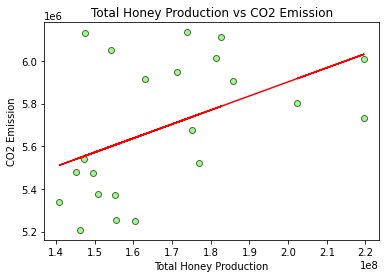

In [93]:
x = CO2andHoney['Total Production']
y = CO2andHoney['CO2']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter (x,y, marker='o',
    facecolors='palegreen',
    edgecolors='darkolivegreen')
plt.plot(x,regress_values,"r-")
plt.annotate (line_eq,(20,36),fontsize=15,color="darkviolet")
plt.title("Total Honey Production vs CO2 Emission")
plt.xlabel("Total Honey Production")
plt.ylabel("CO2 Emission")
print(f"The r-squared is: {rvalue}")
plt. show